In [1]:
import sqlite3
sys.path.append('c:/users/cschiff/Documents/GitHub/PAD/')
import Grapher

In [2]:
sqlite_file = 'c:/users/cschiff/Documents/GitHub/PAD/instrument_data_db.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

In [3]:
fpi_prd1 = 'x:'

In [127]:
parms = {'time_format'  :mdates.DateFormatter('%H:%M'),
         'time_location':mdates.MinuteLocator(range(0,59),interval = 10,tz=None)}
delta = dt.timedelta(minutes=1)

In [4]:
obs        = 'mms1'
year       = 2017
month      = 5
day        = 22

In [5]:
instrument = 'fpi'
mode       = 'brst'
ver        = '3.1.0'

In [6]:
descriptor = 'des-debug'
eresult = cursor.execute('Select filename from fpi_data where\
                                                    obs        = "%s" and\
                                                    mode       = "%s" and\
                                                    descriptor = "%s" and\
                                                    year       =  %s  and\
                                                    month      =  %s  and\
                                                    day        =  %s;' % 
                                                    (obs,mode,descriptor,year,month,day))
e = eresult.fetchall()

descriptor = 'dis-debug'
iresult = cursor.execute('Select filename from fpi_data where\
                                                    obs        = "%s" and\
                                                    mode       = "%s" and\
                                                    descriptor = "%s" and\
                                                    year       =  %s  and\
                                                    month      =  %s  and\
                                                    day        =  %s;' % 
                                                    (obs,mode,descriptor,year,month,day))
i = iresult.fetchall()

In [144]:
N = 11
print e[N][0]

/data/ftp/mms1/fpi/brst/l2/des-debug/2017/05/22/mms1_fpi_brst_l2_des-debug_20170522082033_v3.1.0.cdf


In [145]:
edebug = pycdf.CDF(fpi_prd1+e[N][0])
idebug = pycdf.CDF(fpi_prd1+i[N][0])

In [146]:
e_t = np.asarray(edebug['Epoch'])
i_t = np.asarray(idebug['Epoch'])

In [147]:
e_n = np.asarray(edebug['%s_des_numberdensity_%s' % (obs,mode)])
i_n = np.asarray(idebug['%s_dis_numberdensity_%s' % (obs,mode)])

In [148]:
e_Tperp = np.asarray(edebug['%s_des_tempperp_%s' % (obs,mode)])
i_Tperp = np.asarray(idebug['%s_dis_tempperp_%s' % (obs,mode)])

In [149]:
e_V = np.asarray(edebug['%s_des_bulkv_gse_%s' % (obs,mode)])
i_V = np.asarray(idebug['%s_dis_bulkv_gse_%s' % (obs,mode)])

In [150]:
e_B = np.asarray(edebug['%s_des_b_gse_srvy' % obs])
i_B = np.asarray(idebug['%s_dis_b_gse_srvy' % obs])

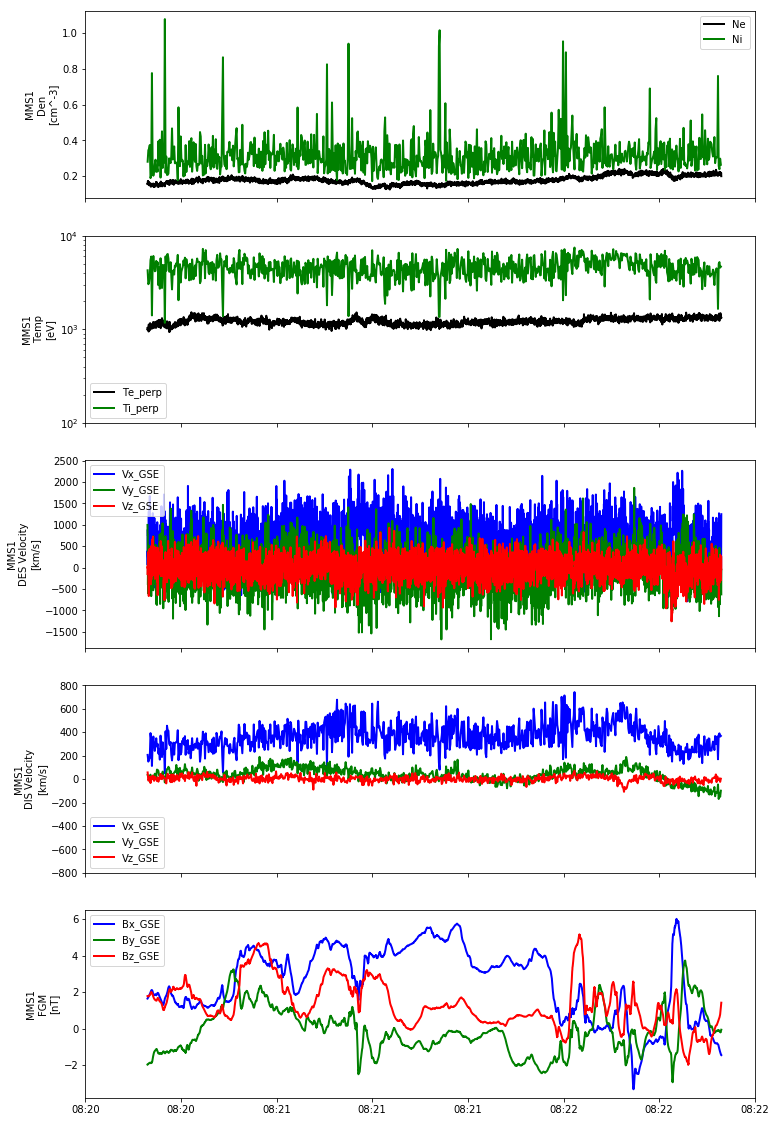

In [152]:
fig,axs = plt.subplots(nrows=5,ncols=1,sharex=True,figsize=(12,20))
c1 = Grapher.traces(axs[0],e_t,e_n)
c1.add_line(i_t,i_n)
c1.customize_line(0,{'color':'black','label':'Ne'})
c1.customize_line(1,{'color':'green','label':'Ni'})
c1.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nDen\n[cm^-3]','ylim':'','yscale':''})
c2 = Grapher.traces(axs[1],e_t,e_Tperp)
c2.add_line(i_t,i_Tperp)
c2.customize_line(0,{'color':'black','label':'Te_perp'})
c2.customize_line(1,{'color':'green','label':'Ti_perp'})
c2.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nTemp\n[eV]','ylim':[1e2,1e4],'yscale':'log'})
c3 = Grapher.traces(axs[2],e_t,e_V[:,0])
c3.add_line(e_t,e_V[:,1])
c3.add_line(e_t,e_V[:,2])
c3.customize_line(0,{'color':'blue',  'label':'Vx_GSE'})
c3.customize_line(1,{'color':'green', 'label':'Vy_GSE'})
c3.customize_line(2,{'color':'red',   'label':'Vz_GSE'})
c3.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nDES Velocity\n[km/s]','ylim':'','yscale':''})
c4 = Grapher.traces(axs[3],i_t,i_V[:,0])
c4.add_line(i_t,i_V[:,1])
c4.add_line(i_t,i_V[:,2])
c4.customize_line(0,{'color':'blue',  'label':'Vx_GSE'})
c4.customize_line(1,{'color':'green', 'label':'Vy_GSE'})
c4.customize_line(2,{'color':'red',   'label':'Vz_GSE'})
c4.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nDIS Velocity\n[km/s]','ylim':[-800,800],'yscale':''})
c5 = Grapher.traces(axs[4],e_t,e_B[:,0])
c5.add_line(e_t,e_B[:,1])
c5.add_line(e_t,e_B[:,2])
c5.customize_line(0,{'color':'blue',  'label':'Bx_GSE'})
c5.customize_line(1,{'color':'green', 'label':'By_GSE'})
c5.customize_line(2,{'color':'red',   'label':'Bz_GSE'})
c5.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nFGM\n[nT]','ylim':[],'yscale':''})
c5.format_ax_time(e_t,'brst')

In [108]:
edebug.close()
idebug.close()

In [116]:
axs[4].xaxis.set_major_locator(mdates.DateFormatter['%H:%M'])

TypeError: 'type' object has no attribute '__getitem__'

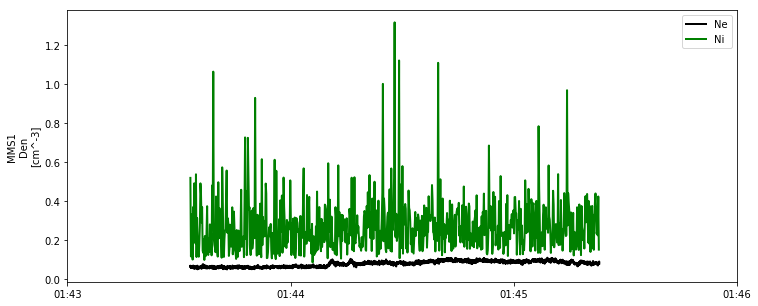

In [131]:
fig,axs = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(12,5))
c1 = Grapher.traces(axs,e_t,e_n)
c1.add_line(i_t,i_n)
c1.customize_line(0,{'color':'black','label':'Ne'})
c1.customize_line(1,{'color':'green','label':'Ni'})
c1.customize_ax({'loc':'best','xlabel':'','xscale':'','xlim':[],'ylabel':'MMS1\nDen\n[cm^-3]','ylim':'','yscale':''})
c1.format_ax_time(e_t,'brst')

In [126]:
Grapher.Convert.round_time(e_t[0],date_delta=Grapher.brst_delta,to='down')

datetime.datetime(2017, 5, 22, 1, 43)